In [1]:
!pip install ptitprince

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ptitprince as pt
DATA_PAHT = 'path_do_data'

condition
exp1_Now      0.52040
exp1_Later    0.59825
Name: P(I), dtype: float64
condition
exp1_Now      0.018735
exp1_Later    0.015889
Name: P(I), dtype: float64
condition
exp2_Now      5.543544
exp2_Later    6.060433
Name: P(I), dtype: float64
condition
exp2_Now      0.168453
exp2_Later    0.157032
Name: P(I), dtype: float64
condition
exp3_Now_standard      0.483483
exp3_Later_standard    0.562965
exp3_Now_elevated      0.552912
exp3_Later_elevated    0.576484
Name: P(I), dtype: float64
condition
exp3_Now_standard      0.023190
exp3_Later_standard    0.023779
exp3_Now_elevated      0.020352
exp3_Later_elevated    0.020318
Name: P(I), dtype: float64
condition
exp4_Now      0.452631
exp4_Later    0.492903
Name: P(I), dtype: float64
condition
exp4_Now      0.019565
exp4_Later    0.015022
Name: P(I), dtype: float64


<ipython-input-3-457cd293b738>:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


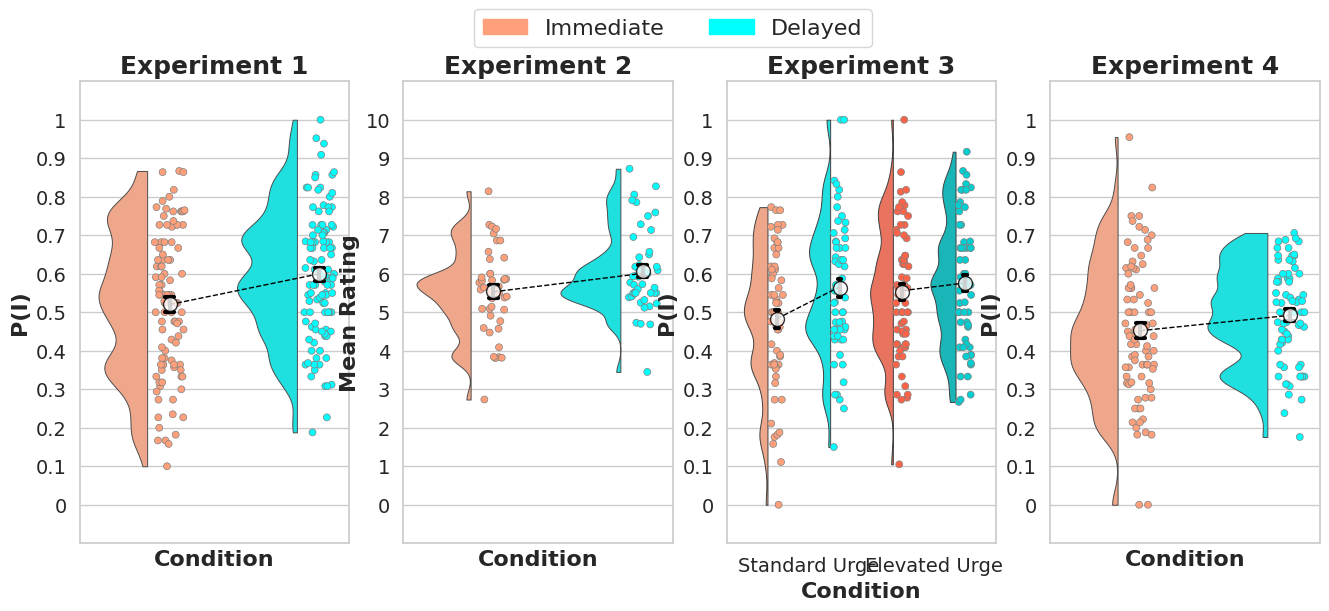

In [3]:


df = pd.read_csv('path_do_data')
melted_df = df.melt(var_name='condition', value_name='P(I)')
new_df = pd.DataFrame({
    'condition': melted_df['condition'],
    'P(I)': melted_df['P(I)']})

# colors & labels
now_color = "#FFA07A"
later_color = "#00FFFF"
now_urge_color = "#FF6347"
later_urge_color = "#00CED1"
# now_color = "tan"
# later_color = "lightgreen"
# now_urge_color = "peru"
# later_urge_color = "yellowgreen"
labels_exp1_exp3_exp4 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels_exp2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

sns.set(style="whitegrid", font_scale=1)

def create_plots(ax, data, dx, dy, palette, order, ylim, yticks, xlabel=None, ylabel=None, xticks=True):
    ort = 'v'
    means = data.groupby(dx)[dy].mean()
    means = means.reindex(order)
    sems = data.groupby(dx)[dy].sem()
    sems = sems.reindex(order)
    print(means)
    print(sems)

    # Cloud
    ax = pt.half_violinplot(x=dx, y=dy, ax=ax, data=data, palette=palette, bw=0.2, cut=0., zorder=1,
                            scale="area", width=0.8, inner=None, orient=ort, linewidth=0.7, order=order)
    # Scatter
    ax = sns.stripplot(x=dx, y=dy, ax=ax, data=data, palette=palette, edgecolor="grey", linewidth=0.5, zorder=2,
                       size=5, jitter=1, alpha=1, dodge=True, order=order)
    # Mean
    ax = sns.boxplot(x=dx, y=dy, ax=ax, data=data, color="grey", meanline=False, width=0.15, zorder=4,
                     showcaps=False, boxprops={'facecolor': 'none', "zorder": 4},
                     showfliers=False, saturation=1, orient=ort, showmeans=True,
                     meanprops={"marker": "o", "markersize": 10, "markerfacecolor": "white",
                                "markeredgecolor": "black", "alpha": 0.8}, medianprops={
            'visible': False}, whiskerprops={'visible': False}, showbox=False, order=order)

    # Error bars & caps
    for i, mean in enumerate(means):
        ax.errorbar(i, mean, yerr=sems[i], fmt='none', color='black', capsize=1 ,elinewidth=3, zorder=3, alpha=0.9)
    cap_size = 6
    for i, mean in enumerate(means):
        ax.plot([i - cap_size / 200, i + cap_size / 200], [mean + sems[i], mean + sems[i]], color='black',
                linewidth=3)
        ax.plot([i - cap_size / 200, i + cap_size / 200], [mean - sems[i], mean - sems[i]], color='black',
                linewidth=3)

    # Labels & ticks
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=14)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16, fontweight='bold')
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=16, fontweight='bold')
    if not xticks:
        ax.set_xticks([])
    else:
        ax.set_xticks([0.5, 2.5])
        ax.set_xticklabels(["Standard Urge", "Elevated Urge"], fontsize=14)
    ax.set_xlabel("Condition", fontsize=16, fontweight='bold')
    return ax


fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Experiment 1
axs[0] = create_plots(axs[0], new_df[new_df['condition'].str.startswith('exp1')], "condition", "P(I)",
                      [now_color, later_color], ["exp1_Now", "exp1_Later"], [-0.1, 1.1], labels_exp1_exp3_exp4, ylabel="P(I)", xticks=False)
axs[0].plot(["exp1_now", "exp1_later"], [0.52, 0.60], '--', lw=1, color="black")
axs[0].set_title("Experiment 1", fontsize=18, fontweight='bold')
axs[0].set_xlim(-0.6, 1.2)

# Experiment 2
axs[1] = create_plots(axs[1], new_df[new_df['condition'].str.startswith('exp2')], "condition", "P(I)",
                      [now_color, later_color], ["exp2_Now", "exp2_Later"], [-1, 11], labels_exp2, ylabel="Mean Rating", xticks=False)
axs[1].plot(["exp2_now", "exp2_later"], [5.53, 6.01], '--', lw=1, color="black")
axs[1].set_title("Experiment 2", fontsize=18, fontweight='bold')
axs[1].set_xlim(-0.6, 1.2)

# Experiment 3
axs[2] = create_plots(axs[2], new_df[new_df['condition'].str.startswith('exp3')].dropna(subset=['P(I)']), "condition", "P(I)",
                      [now_color, later_color, now_urge_color, later_urge_color],
                      ["exp3_Now_standard", "exp3_Later_standard", "exp3_Now_elevated", "exp3_Later_elevated"],
                      [-0.1, 1.1], labels_exp1_exp3_exp4, ylabel="P(I)", xticks=True)
axs[2].plot(["exp3_Now_standard", "exp3_Later_standard"], [0.483, 0.566], '--', lw=1, color="black")
axs[2].plot(["exp3_Now_elevated", "exp3_Later_elevated"], [0.556, 0.576], '--', lw=1, color="black")
axs[2].set_title("Experiment 3", fontsize=18, fontweight='bold')
axs[2].set_xlim(-0.8, 3.5)

# Experiment 4
axs[3] = create_plots(axs[3], new_df[new_df['condition'].str.startswith('exp4')], "condition", "P(I)",
                      [now_color, later_color], ["exp4_Now", "exp4_Later"], [-0.1, 1.1], labels_exp1_exp3_exp4, ylabel="P(I)", xticks=False)
axs[3].plot(["exp4_no", "exp4_yes"], [0.452, 0.492], '--', lw=1, color="black")
axs[3].set_title("Experiment 4", fontsize=18, fontweight='bold')
axs[3].set_xlim(-0.6, 1.2)

# Legend
now_patch = mpatches.Patch(color=now_color, label='Immediate')
later_patch = mpatches.Patch(color=later_color, label='Delayed')
plt.legend(loc="lower center", handles=[now_patch, later_patch], ncol=2, bbox_to_anchor=(-1.4, 1.05),  fontsize=16)

plt.tight_layout()
plt.show()
